![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [165]:
# Start your code here!
import pandas as pd
men_results = pd.read_csv('men_results.csv', parse_dates=["date"], dtype={"TIME OCC": str})
men_results['tournament'].value_counts()['FIFA World Cup']
# men_results.columns

964

In [166]:
#Extracting women data and getting information on the dataset (constitution and number of entries for FIFA World Cup)
women_results = pd.read_csv("women_results.csv", parse_dates=["date"], dtype={"TIME OCC": str})
info = women_results.info()
print(info)
women_results['tournament'].value_counts()['FIFA World Cup']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object        
 4   home_score  4884 non-null   int64         
 5   away_score  4884 non-null   int64         
 6   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 267.2+ KB
None


284

In [167]:
#Selecting only the values for which we have 'tournament' = 'Fifa World Cup'
women_WC = women_results[women_results['tournament'].isin(['FIFA World Cup'])]
print('Women: ' + women_WC['tournament'].value_counts().astype(str))
#For after 2002 records
women_2002 = women_WC[women_WC['date'] > '2002-01-01']
#Making sure we didn't retain any dates before 2002-01-01
print(women_2002.head())

#Same with men
men_WC = men_results[men_results['tournament'].isin(['FIFA World Cup'])]
print('Men: ' + men_WC['tournament'].value_counts().astype(str))
men_2002 = men_WC[men_WC['date'] > '2002-01-01']
print(men_2002.head())



FIFA World Cup    Women: 284
Name: tournament, dtype: object
      Unnamed: 0       date  ... away_score      tournament
1600        1600 2003-09-20  ...          3  FIFA World Cup
1601        1601 2003-09-20  ...          0  FIFA World Cup
1602        1602 2003-09-20  ...          1  FIFA World Cup
1603        1603 2003-09-20  ...          0  FIFA World Cup
1604        1604 2003-09-21  ...          1  FIFA World Cup

[5 rows x 7 columns]
FIFA World Cup    Men: 964
Name: tournament, dtype: object
       Unnamed: 0       date  ... away_score      tournament
25164       25164 2002-05-31  ...          1  FIFA World Cup
25165       25165 2002-06-01  ...          0  FIFA World Cup
25166       25166 2002-06-01  ...          1  FIFA World Cup
25167       25167 2002-06-01  ...          2  FIFA World Cup
25168       25168 2002-06-02  ...          0  FIFA World Cup

[5 rows x 7 columns]


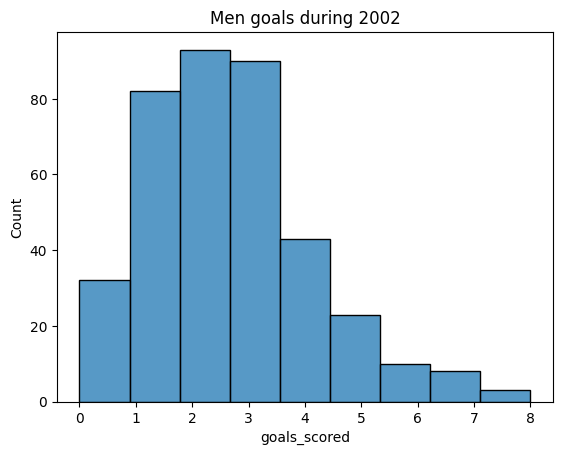

In [168]:
#Checking if men scores have a normaly distributed shape
#Creating a new column for total scores
import matplotlib.pyplot as plt
import seaborn as sns
men_2002['goals_scored'] = men_2002['home_score'] + men_2002['away_score']
g = sns.histplot(data = men_2002, x='goals_scored', bins = 9)
g.set_title('Men goals during 2002')
plt.show()

      Unnamed: 0       date  ...      tournament goals_scored
1600        1600 2003-09-20  ...  FIFA World Cup            3
1601        1601 2003-09-20  ...  FIFA World Cup            2
1602        1602 2003-09-20  ...  FIFA World Cup            5
1603        1603 2003-09-20  ...  FIFA World Cup            6
1604        1604 2003-09-21  ...  FIFA World Cup            4

[5 rows x 8 columns]


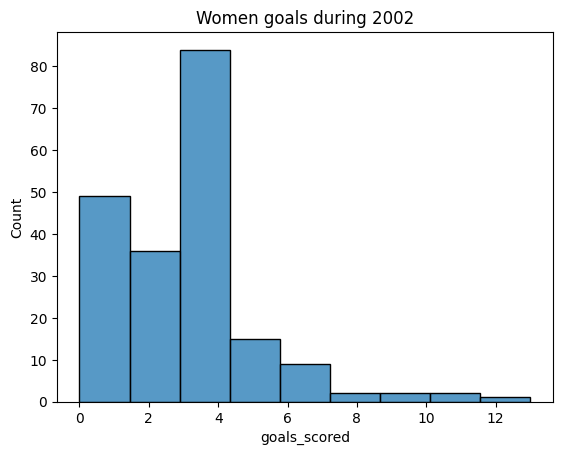

In [169]:
#Doing the same thing for women 
women_2002['goals_scored'] = women_2002['home_score'] + women_2002['away_score']
print(women_2002.head())
g = sns.histplot(data = women_2002, x='goals_scored', bins = 9)
g.set_title('Women goals during 2002')
plt.show()

In [173]:
import scipy.stats

# Get the p value doing a Wilcoxon-Mann-Whitney test
mwu_test = scipy.stats.mannwhitneyu(x = women_2002['goals_scored'], y = men_2002['goals_scored'], alternative = 'greater')
p_val = mwu_test.pvalue
print(p_val)
# The p-value is lower than the significance level, so we can reject the null hypothesis in favor of H1
result = 'reject'

0.005106609825443641


In [171]:
result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}